# Inscriptions as data: digital epigraphy in macro-historical perspective

Part 2
Python

In [1]:
!pip3 install matplotlib>=3.4 sddk tempun scipy seaborn nltk

In [2]:
# Python requirements:
import nltk
import scipy
from scipy.stats import trapz
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import pandas as pd
import sddk
import tempun # from tempun import *
import requests

#!pip install -r requirements.txt

In [3]:
# Loading the EDH dataset from public folder on Sciencedata.dk using sddk package

publicfolder = "b6b6afdb969d378b70929e86e58ad975"
EDH = sddk.read_file("EDH_text_cleaned_2021-01-21.json", "df", publicfolder)
EDH.head(5)

reading file located in a public folder


,responsible_individual,type_of_inscription,letter_size,not_after,literature,work_status,height,diplomatic_text,people,depth,...,clean_text_conservative,clean_text_interpretive_word,clean_text_interpretive_sentence,findspot,year_of_find,present_location,religion,geography,social_economic_legal_history,military
0,Feraudi,epitaph,3.2-2 cm,0130,"AE 1983, 0192.; M. Annecchino, Puteoli 4/5, 19...",provisional,33 cm,D M / NONIAE P F OPTATAE / ET C IVLIO ARTEMONI...,"[{'name': 'Noniae P.f. Optatae', 'cognomen': '...",2.7 cm,...,D M Noniae P f Optatae et C Iulio Artemoni par...,Dis Manibus Noniae Publi filiae Optatae et Cai...,Dis Manibus Noniae Publi filiae Optatae et Cai...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Feraudi,epitaph,4 cm,0200,"AE 1983, 0080. (A); A. Ferrua, RAL 36, 1981, 1...",no image,28 cm,C SEXTIVS PARIS / QVI VIXIT / ANNIS LXX,"[{'nomen': 'Sextius', 'praenomen': 'C.', 'pers...",NaN,...,C Sextius Paris qui vixit annis LXX,Caius Sextius Paris qui vixit annis LXX,Caius Sextius Paris qui vixit annis LXX,"Via Nomentana, S. Alessandro, Kirche",1937,NaN,NaN,NaN,NaN,NaN
2,Feraudi,honorific inscription,4.5-3 cm,0170,"AE 1983, 0518. (B); J. González, ZPE 52, 1983,...",provisional,(37) cm,[ ]VMMIO [ ] / [ ]ISENNA[ ] / [ ] XV[ ] / [ ] / [,"[{'nomen': 'Mummius+', 'gender': 'male', 'prae...",(12) cm,...,ummio isenna Xv,Publio Mummio Publi filio Galeria Sisennae Rut...,Publio Mummio Publi filio Galeria Sisennae Rut...,NaN,before 1975,"Sevilla, Privatbesitz",NaN,NaN,NaN,NaN
3,Gräf,votive inscription,2.5 cm,0200,"AE 1983, 0533. (B); A.U. Stylow, Gerión 1, 198...",checked with photo,(39) cm,[ ]AVS[ ]LLA / M PORCI NIGRI SER / DOMINAE VEN...,[{'name': '[---?]AV(?)S(?)[---]L(?)L(?)A M. Po...,18 cm,...,AVSLLA M Porci Nigri ser dominae Veneri aram p...,AVS LLA Marci Porci Nigri serva dominae Veneri...,AVS LLA Marci Porci Nigri serva dominae Veneri...,NaN,before 1979,"Carcabuey, Grupo Escolar",names of pagan deities,NaN,NaN,NaN
4,Feraudi,epitaph,NaN,0200,"AE 1983, 0078. (B); A. Ferrua, RAL 36, 1981, 1...",no image,NaN,[ ] L SVCCESSVS / [ ] L L IRENAEVS / [ ] C L T...,"[{'person_id': '1', 'name': '[---]l. Successus...",NaN,...,l Successus L l Irenaeus C l Tyches unt renti f,libertus Successus Luci libertus Irenaeus Cai ...,libertus Successus Luci libertus Irenaeus Cai ...,Via Cupa (ehem. Vigna Nardi),NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Loading the EDCS dataset from public folder on Sciencedata.dk using sddk package

publicfolder = "1f5f56d09903fe259c0906add8b3a55e"
EDCS = sddk.read_file("EDCS_text_cleaned_2021-03-01.json", "df", publicfolder)
EDCS.head(5)

reading file located in a public folder


,EDCS-ID,publication,province,province_list,place,place_list,end_yr_list,notes_dating,status_list,inscr_type,...,dating from,dating to,start_yr,end_yr_1,status,Latitude,Longitude,photo,Material,Comment
0,EDCS-31400030,"CIL 03, 12297",Achaia,Achaia,?,?,{},,{},{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EDCS-24700151,"CIL 01, 02650 (p 1097) = IG-05-01, 00741 = ILL...",Achaia,Achaia,Afesou,Afesou,{},,{},{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EDCS-24900077,"CIL 01, 00746 (p 944) = D 00867 = ILLRP 00374 ...",Achaia,Achaia,Agia Triada / Merbaka / Midea,"[Agia Triada, Merbaka, Midea]",-68,,"[officium/professio, ordo senatorius, tituli h...",tituli honorarii,...,-68,-68,-68.0,-68.0,officium/professio; ordo senatorius; tituli ho...,37.6381128,22.8052991,http://db.edcs.eu/epigr/bilder.php?bilder.php?...,NaN,NaN
3,EDCS-03700724,"ZPE-108-159 = Thesprotia 00001 = AE 1993, 0140...",Achaia,Achaia,Agios Athanasios / Photike,"[Agios Athanasios, Photike]",313,,"[Augusti/Augustae, litterae erasae, ordo eques...",tituli honorarii,...,309,313,309.0,313.0,Augusti/Augustae; litterae erasae; ordo equest...,39.4512182,20.7667673,http://db.edcs.eu/epigr/bilder.php?bilder.php?...,NaN,NaN
4,EDCS-55701593,"AE 2009, 01286a",Achaia,Achaia,Agios Donatos / Photike,"[Agios Donatos, Photike]",{},,"[sigilla impressa, tituli fabricationis]",tituli fabricationis,...,NaN,NaN,NaN,NaN,sigilla impressa; tituli fabricationis,39.4759759,20.5069076,NaN,opus figlinae,NaN


## Dealing with biases - modelling temporal uncertainty in historical datasets

** this section is not finished **

Tempun https://github.com/sdam-au/tempun functions explained on epigraphic examples

Methodological introduction into modelling of chronological historic datasets.

## Inscriptions in space and time

** this section is not finished **

We will use Python function and the datasets to create a chronological pverview of the dataset, using the tempun models and the EDH and EDCS datasets.

- Display all inscriptions over time in EDH + EDCS next to each other
- Display inscriptions by province over time EDH + EDCS separate (6 most numerous)
- Display inscriptions by their type over time
- Display all milestones along with roads (and cities), link to DigLit research, Tom's Minerva, Bara etc.

### Epigraphic production over time comparing EDH and EDCS dataset

#### Temporal simulation of dated inscriptions in the EDH dataset

In [5]:
# EDH dataset
EDH["not_after"] = pd.to_numeric(EDH["not_after"])
EDH["not_before"] = pd.to_numeric(EDH["not_before"])

### How many inscriptions have at least one date
EDH_dated = EDH[(EDH["not_before"].notnull()) | (EDH["not_after"].notnull())]
len(EDH_dated)

59788

In [6]:
# How many inscriptions do not have the end date
len(EDH_dated[EDH_dated["not_after"].isnull()])

3507

In [7]:
%%time
# Generate a list of 1000 random dates for each inscription in the dataset

EDH_dated["random_dates"] = EDH_dated.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], size=1000,), axis=1)

CPU times: user 33.7 s, sys: 1.34 s, total: 35.1 s
Wall time: 35 s


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
%%time
# Count random dates in temporal bins (timeblocks) in a specified time range

EDH_complete_simulations = tempun.timeblocks_from_randoms(EDH_dated, "random_dates", [-200, 600, 25])

CPU times: user 2.99 s, sys: 17 ms, total: 3.01 s
Wall time: 3 s


In [9]:
# Output of the first of 1000 simulations, total numbers of inscriptions counted in timeblocks
EDH_complete_simulations[0]

[((-200, -176), 17),
 ((-175, -151), 21),
 ((-150, -126), 20),
 ((-125, -101), 52),
 ((-100, -76), 104),
 ((-75, -51), 116),
 ((-50, -26), 281),
 ((-25, -1), 792),
 ((1, 25), 2289),
 ((26, 50), 2708),
 ((51, 75), 2975),
 ((76, 100), 3845),
 ((101, 125), 5216),
 ((126, 150), 5386),
 ((151, 175), 6205),
 ((176, 200), 6530),
 ((201, 225), 6196),
 ((226, 250), 5323),
 ((251, 275), 3356),
 ((276, 300), 2779),
 ((301, 325), 936),
 ((326, 350), 690),
 ((351, 375), 681),
 ((376, 400), 686),
 ((401, 425), 441),
 ((426, 450), 363),
 ((451, 475), 292),
 ((476, 500), 298),
 ((501, 525), 221),
 ((526, 550), 214),
 ((551, 575), 205),
 ((576, 600), 195)]

#### Temporal simulation of dated inscriptions in the EDCS dataset

In [13]:
# EDCS dataset
EDCS["start_yr"] = pd.to_numeric(EDCS["start_yr"])
EDCS["end_yr_1"] = pd.to_numeric(EDCS["end_yr_1"])

### how many of the inscriptions have at least one date
EDCS_dated = EDCS[(EDCS["start_yr"].notnull()) | (EDCS["end_yr_1"].notnull())]
len(EDCS_dated)

164452

In [14]:
# How many inscriptions do not have the end date
len(EDCS_dated[EDCS_dated["end_yr_1"].isnull()])

117

In [15]:
%%time
# Generate a list of 1000 random dates for each inscription in the dataset
EDCS_dated["random_dates"] = EDCS_dated.apply(lambda row: tempun.model_date(row["start_yr"], row["end_yr_1"], size=1000,), axis=1)

CPU times: user 1min 36s, sys: 4.42 s, total: 1min 41s
Wall time: 1min 41s


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
%%time
# Count random dates in temporal bins (timeblocks) in a specified time range
EDCS_complete_simulations = tempun.timeblocks_from_randoms(EDCS_dated, "random_dates", [-200, 600, 25])

CPU times: user 10.9 s, sys: 32.7 ms, total: 11 s
Wall time: 11 s


In [17]:
# Output of the first of 1000 simulations, total numbers of inscriptions counted in timeblocks
EDCS_complete_simulations[0]

[((-200, -176), 190),
 ((-175, -151), 168),
 ((-150, -126), 281),
 ((-125, -101), 461),
 ((-100, -76), 950),
 ((-75, -51), 1042),
 ((-50, -26), 2025),
 ((-25, -1), 4145),
 ((1, 25), 11473),
 ((26, 50), 10964),
 ((51, 75), 10663),
 ((76, 100), 10611),
 ((101, 125), 12525),
 ((126, 150), 11462),
 ((151, 175), 11237),
 ((176, 200), 12217),
 ((201, 225), 11188),
 ((226, 250), 8133),
 ((251, 275), 5398),
 ((276, 300), 4923),
 ((301, 325), 4996),
 ((326, 350), 4381),
 ((351, 375), 5065),
 ((376, 400), 4989),
 ((401, 425), 3006),
 ((426, 450), 2393),
 ((451, 475), 2095),
 ((476, 500), 2096),
 ((501, 525), 703),
 ((526, 550), 706),
 ((551, 575), 484),
 ((576, 600), 460)]

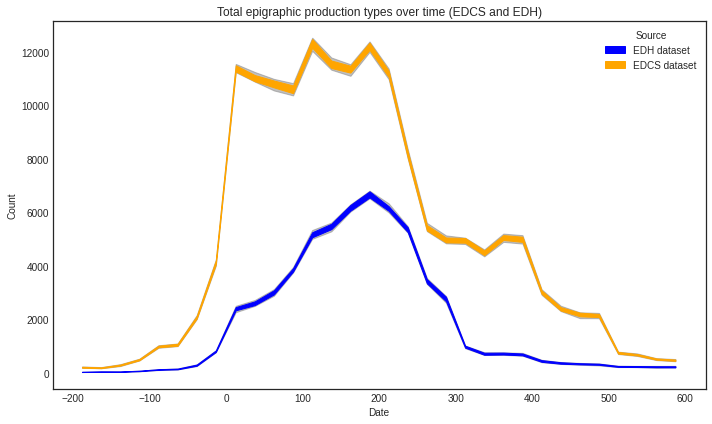

In [88]:
tab_colors_list = list(mcolors.TABLEAU_COLORS.keys())
plt.style.use("seaborn-white")

fig, ax  = plt.subplots(figsize=(10, 6), tight_layout=True)

#for ins_type_sims, color in zip(EDH_complete_simulations, tab_colors_list[:len(EDH_complete_simulations)]):
#    tempun.plot_timeblocks_data(sim_data[2], ax=ax, color=color)

tempun.plot_timeblocks_data(EDH_complete_simulations, ax=ax, color="blue", label = "EDH dataset")
tempun.plot_timeblocks_data(EDCS_complete_simulations, ax=ax, color="orange", label = "EDCS dataset")
    
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.set_title("Total epigraphic production types over time (EDCS and EDH)")
ax.legend(title="Source", bbox_to_anchor=(1, 1), loc='upper right')


### Function of inscriptions over time

In [10]:
%%time
# Inscriptions by type over time

simulations_by_type_len_EDH = []

for ins_type in EDH["type_of_inscription_clean"].unique():
    if ins_type != "NULL":
        subset_df = EDH_dated[EDH_dated["type_of_inscription_clean"]==ins_type]
        simulations_by_type_len_EDH.append((ins_type, len(subset_df)))
simulations_by_type_len_EDH = sorted(simulations_by_type_len_EDH, key = lambda x: x[1], reverse=True)
simulations_by_type_len_EDH

simulations_by_type_EDH = []

for ins_type_tup in simulations_by_type_len_EDH[:10]:
    subset_df = EDH_dated[EDH_dated["type_of_inscription_clean"]==ins_type_tup[0]]
    simulations = tempun.timeblocks_from_randoms(subset_df, "random_dates", [-200, 600, 25])
    ins_type_N =len(subset_df)
    simulations_by_type_EDH.append([ins_type_tup[0],ins_type_N, simulations]) 
simulations_by_type_EDH = sorted(simulations_by_type_EDH, key=lambda x: x[1], reverse=True)

date_vars_by_instypes = []
for ins_type_tup in simulations_by_type_len_EDH[:10]:
    subset_df = EDH_dated[EDH_dated["type_of_inscription_clean"]==ins_type_tup[0]]
    date_vars = []
    for n in range(100):
        date_vars.append([date_var[n] for date_var in subset_df["random_dates"] if date_var != None])
    date_vars_by_instypes.append(date_vars)

CPU times: user 5.18 s, sys: 59.4 ms, total: 5.24 s
Wall time: 5.23 s


In [11]:
simulations_by_type_len_EDH

[('epitaph', 25516),
 ('votive inscription', 13018),
 ('owner/artist inscription', 4224),
 ('honorific inscription', 3576),
 ('building/dedicatory inscription', 3107),
 ('mile-/leaguestone', 1630),
 ('identification inscription', 1377),
 ('acclamation', 470),
 ('military diploma', 410),
 ('list', 328),
 ('defixio', 297),
 ('label', 232),
 ('boundary inscription', 203),
 ('public legal inscription', 182),
 ('elogium', 138),
 ('letter', 121),
 ('seat inscription', 66),
 ('prayer', 50),
 ('private legal inscription', 43),
 ('assignation inscription', 16),
 ('calendar', 11),
 ('adnuntiatio', 3)]

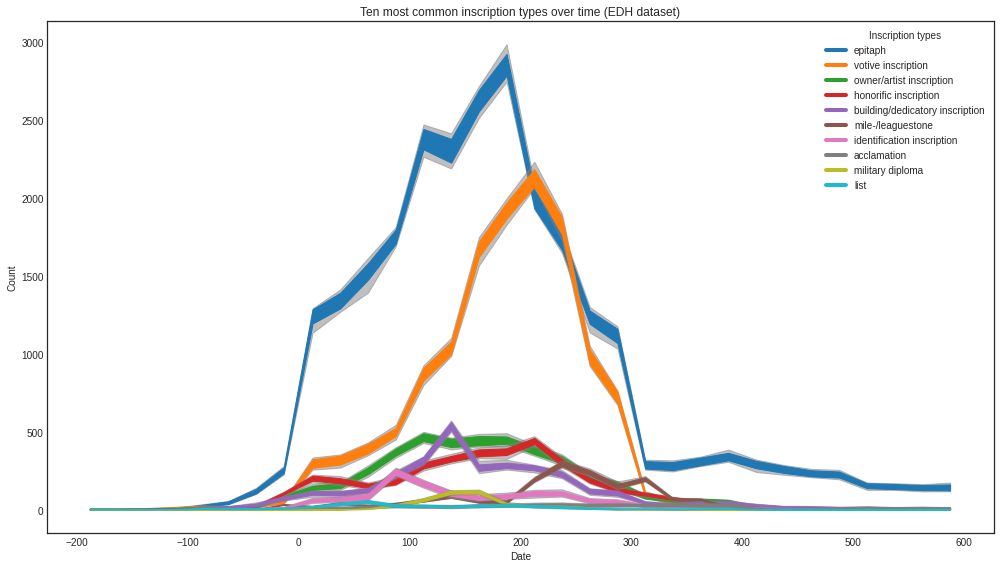

In [12]:
tab_colors_list = list(mcolors.TABLEAU_COLORS.keys())
plt.style.use("seaborn-white")

fig, ax  = plt.subplots(figsize=(14, 8), tight_layout=True)

for ins_type_sims, color in zip(simulations_by_type_EDH, tab_colors_list[:len(simulations_by_type_EDH)]):
    tempun.plot_timeblocks_data(ins_type_sims[2], ax=ax, color=color)
    
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.set_title("Ten most common inscription types over time (EDH dataset)")
 
markers = [plt.Line2D([0,0],[0,0],color=color, lw=4) for color in tab_colors_list[:len(simulations_by_type_EDH)]]
plt.legend(markers, [tup[0] for tup in simulations_by_type_EDH], numpoints=1,  title="Inscription types", bbox_to_anchor=(1, 1), loc='upper right')

In [19]:
# Function to transform all inscription types into list form (originally it contains a lot of empty dictionaries etc.)
def clean_inscr_type(el):
    if isinstance(el, str):
        return [el]
    elif isinstance(el, dict):
        return []
    else:
        return el
EDCS_dated["inscr_type_list"] = EDCS_dated["inscr_type"].apply(clean_inscr_type)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [20]:
inscr_types_flatlist = [el for ellist in EDCS_dated["inscr_type_list"].tolist() for el in ellist]
simulations_by_type_len_EDCS = list(nltk.FreqDist(inscr_types_flatlist).most_common())
simulations_by_type_len_EDCS

[('tituli sepulcrales', 82653),
 ('inscriptiones christianae', 27143),
 ('tituli sacri', 20194),
 ('tituli fabricationis', 9381),
 ('tituli operum', 8681),
 ('tituli possessionis', 5845),
 ('tituli honorarii', 5742),
 ('miliaria', 3842),
 ('carmina', 1891),
 ('diplomata militaria', 1033),
 ('leges', 621),
 ('termini', 531),
 ('defixiones', 409),
 ('signacula', 303),
 ('reges', 104),
 ('senatus consulta', 22)]

In [21]:
%%time
# Inscriptions by type over time

simulations_by_type_EDCS = []

for ins_type_tup in simulations_by_type_len_EDCS[:10]:
    subset_df = EDCS_dated[EDCS_dated["inscr_type_list"].apply(lambda x: ins_type_tup[0] in x)]
    simulations = tempun.timeblocks_from_randoms(subset_df, "random_dates", [-200, 600, 25])
    ins_type_N = len(subset_df)
    simulations_by_type_EDCS.append([ins_type_tup[0],ins_type_N, simulations]) 
#simulations_by_type_EDCS = sorted(simulations_by_type_EDCS, key=lambda x: x[1], reverse=True)


date_vars_by_instypes = []
for ins_type_tup in simulations_by_type_len_EDCS[:10]:
    subset_df = EDCS_dated[EDCS_dated["inscr_type_list"].apply(lambda x: ins_type_tup[0] in x)]
    date_vars = []
    for n in range(100):
        date_vars.append([date_var[n] for date_var in subset_df["random_dates"] if date_var != None])
    date_vars_by_instypes.append(date_vars)

CPU times: user 16.1 s, sys: 245 ms, total: 16.4 s
Wall time: 16.4 s


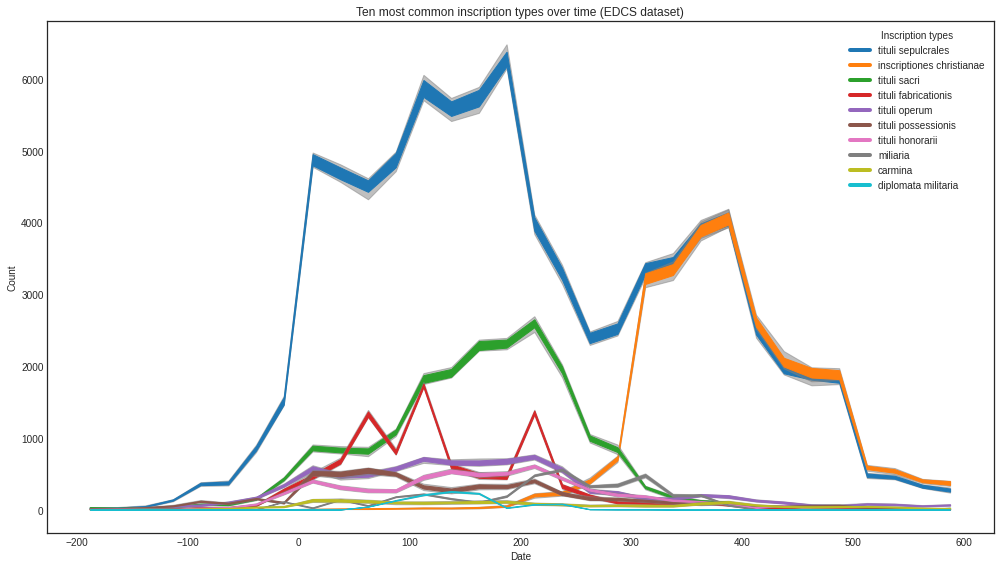

In [22]:
# plot of EDCS only

tab_colors_list = list(mcolors.TABLEAU_COLORS.keys())
plt.style.use("seaborn-white")

fig, ax  = plt.subplots(figsize=(14, 8), tight_layout=True)

for ins_type_sims, color in zip(simulations_by_type_EDCS, tab_colors_list[:len(simulations_by_type_EDCS)]):
    tempun.plot_timeblocks_data(ins_type_sims[2], ax=ax, color=color)
    
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.set_title("Ten most common inscription types over time (EDCS dataset)")
 
markers = [plt.Line2D([0,0],[0,0],color=color, lw=4) for color in tab_colors_list[:len(simulations_by_type_EDCS)]]
plt.legend(markers, [tup[0] for tup in simulations_by_type_EDCS], numpoints=1,  title="Inscription types", bbox_to_anchor=(1, 1), loc='upper right')


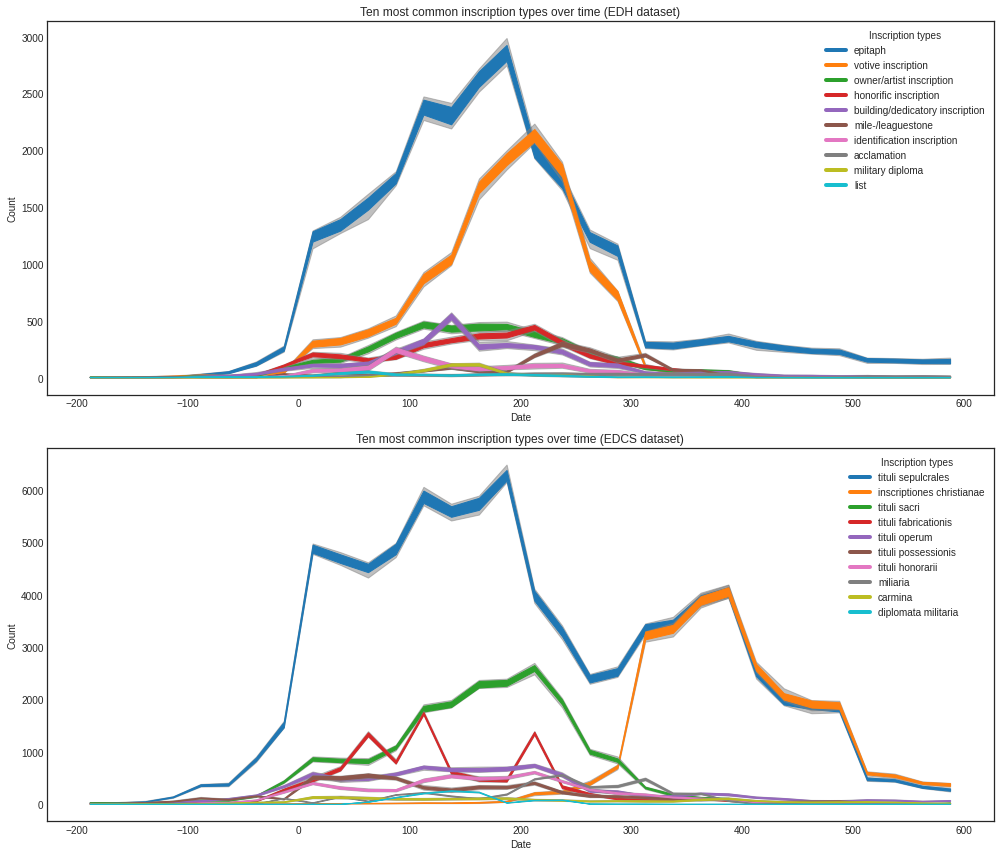

In [23]:
# plot combining EDH and EDCS
tab_colors_list = list(mcolors.TABLEAU_COLORS.keys())
plt.style.use("seaborn-white")

fig, [ax1, ax2]  = plt.subplots(2, 1, figsize=(14, 12), tight_layout=True)

for ins_type_sims, color in zip(simulations_by_type_EDH, tab_colors_list[:len(simulations_by_type_EDH)]):
    tempun.plot_timeblocks_data(ins_type_sims[2], ax=ax1, color=color)
    
ax1.set_xlabel("Date")
ax1.set_ylabel("Count")
ax1.set_title("Ten most common inscription types over time (EDH dataset)")
 
markers = [plt.Line2D([0,0],[0,0],color=color, lw=4) for color in tab_colors_list[:len(simulations_by_type_EDH)]]
ax1.legend(markers, [tup[0] for tup in simulations_by_type_EDH], numpoints=1,  title="Inscription types", bbox_to_anchor=(1, 1), loc='upper right')

for ins_type_sims, color in zip(simulations_by_type_EDCS, tab_colors_list[:len(simulations_by_type_EDCS)]):
    tempun.plot_timeblocks_data(ins_type_sims[2], ax=ax2, color=color)
    
ax2.set_xlabel("Date")
ax2.set_ylabel("Count")
ax2.set_title("Ten most common inscription types over time (EDCS dataset)")
 
markers = [plt.Line2D([0,0],[0,0],color=color, lw=4) for color in tab_colors_list[:len(simulations_by_type_EDCS)]]
ax2.legend(markers, [tup[0] for tup in simulations_by_type_EDCS], numpoints=1,  title="Inscription types", bbox_to_anchor=(1, 1), loc='upper right')

## Spatio-temporal distribution of inscriptions by Provinces

In [109]:
%%time
# Inscriptions by type over time

simulations_by_prov_len_EDH = []

for ins_type in EDH["province_label_clean"].unique():
    if ins_type != "NULL":
        subset_df = EDH_dated[EDH_dated["province_label_clean"]==ins_type]
        simulations_by_prov_len_EDH.append((ins_type, len(subset_df)))
simulations_by_prov_len_EDH = sorted(simulations_by_prov_len_EDH, key = lambda x: x[1], reverse=True)
simulations_by_prov_len_EDH

simulations_by_prov_EDH = []

for ins_type_tup in simulations_by_prov_len_EDH[:10]:
    subset_df = EDH_dated[EDH_dated["province_label"]==ins_type_tup[0]]
    simulations = tempun.timeblocks_from_randoms(subset_df, "random_dates", [-200, 600, 25])
    ins_type_N =len(subset_df)
    simulations_by_prov_EDH.append([ins_type_tup[0],ins_type_N, simulations]) 
simulations_by_prov_EDH = sorted(simulations_by_prov_EDH, key=lambda x: x[1], reverse=True)


CPU times: user 2.24 s, sys: 15.5 ms, total: 2.25 s
Wall time: 2.25 s


In [99]:
simulations_by_prov_len_EDH[:20]

[('Dalmatia', 7543),
 ('Germania superior', 6559),
 ('Britannia', 4402),
 ('Pannonia superior', 4182),
 ('Dacia', 3485),
 ('Pannonia inferior', 3109),
 ('Germania inferior', 3003),
 ('Noricum', 2726),
 ('Hispania citerior', 2668),
 ('Roma', 2556),
 ('Baetica', 2431),
 ('Moesia inferior', 1849),
 ('Numidia', 1599),
 ('Moesia superior', 1327),
 ('Africa Proconsularis', 1228),
 ('Macedonia', 1088),
 ('Raetia', 976),
 ('Belgica', 970),
 ('Latium et Campania (Regio I)', 820),
 ('Achaia', 636)]

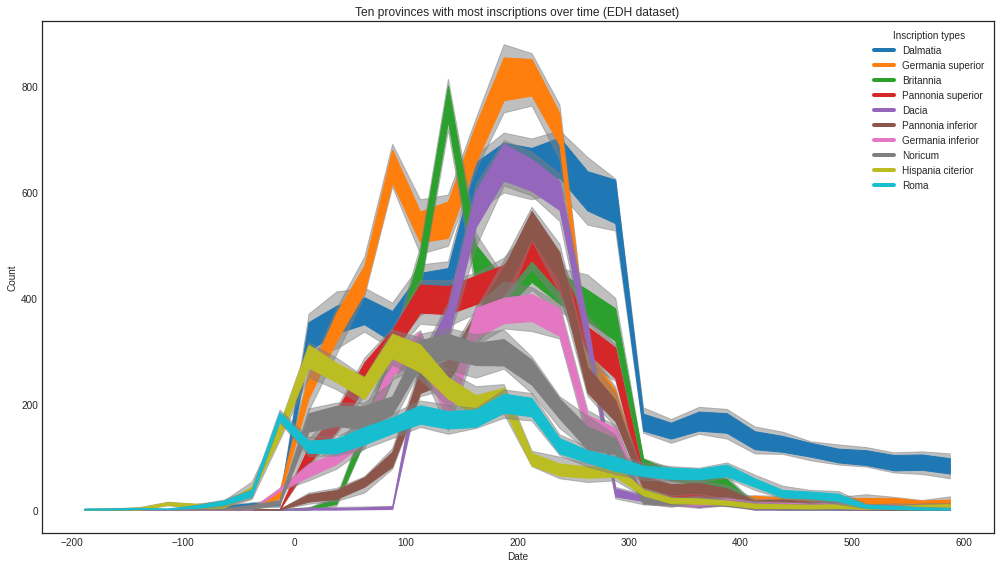

In [110]:
tab_colors_list = list(mcolors.TABLEAU_COLORS.keys())
plt.style.use("seaborn-white")

fig, ax  = plt.subplots(figsize=(14, 8), tight_layout=True)

for ins_type_sims, color in zip(simulations_by_prov_EDH, tab_colors_list[:len(simulations_by_prov_EDH)]):
    tempun.plot_timeblocks_data(ins_type_sims[2], ax=ax, color=color)
    
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.set_title("Ten provinces with most inscriptions over time (EDH dataset)")
 
markers = [plt.Line2D([0,0],[0,0],color=color, lw=4) for color in tab_colors_list[:len(simulations_by_prov_EDH)]]
plt.legend(markers, [tup[0] for tup in simulations_by_prov_EDH], numpoints=1,  title="Inscription types", bbox_to_anchor=(1, 1), loc='upper right')

In [93]:
# Function to transform all inscription types into list form (originally it contains a lot of empty dictionaries etc.)
def clean_province(el):
    if isinstance(el, str):
        return [el]
    elif isinstance(el, dict):
        return []
    else:
        return el
EDCS_dated["province"] = EDCS_dated["province"].apply(clean_province)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [123]:
provinces_flatlist = [el for ellist in EDCS_dated["province"].tolist() for el in ellist]
simulations_by_prov_len_EDCS = list(nltk.FreqDist(provinces_flatlist).most_common())
simulations_by_prov_len_EDCS[:20]

[('Roma', 46695),
 ('Latium et Campania / Regio I', 17852),
 ('Dalmatia', 7687),
 ('Hispania citerior', 6358),
 ('Venetia et Histria / Regio X', 6019),
 ('Germania superior', 5046),
 ('Dacia', 5008),
 ('Pannonia superior', 4628),
 ('Britannia', 3963),
 ('Samnium / Regio IV', 3703),
 ('Etruria / Regio VII', 3512),
 ('Africa proconsularis', 3460),
 ('Apulia et Calabria / Regio II', 3456),
 ('Pannonia inferior', 3217),
 ('Numidia', 3145),
 ('Baetica', 2866),
 ('Umbria / Regio VI', 2846),
 ('Noricum', 2768),
 ('Transpadana / Regio XI', 2678),
 ('Moesia inferior', 2582)]

In [124]:
%%time
# Inscriptions by Province over time

simulations_by_prov_EDCS = []

for ins_type_tup in simulations_by_prov_len_EDCS[:10]:
    subset_df = EDCS_dated[EDCS_dated["province"].apply(lambda x: ins_type_tup[0] in x)]
    simulations = tempun.timeblocks_from_randoms(subset_df, "random_dates", [-200, 600, 25])
    ins_type_N = len(subset_df)
    simulations_by_prov_EDCS.append([ins_type_tup[0],ins_type_N, simulations]) 
#simulations_by_prov_EDCS = sorted(simulations_by_prov_EDCS, key=lambda x: x[1], reverse=True)


date_vars_by_instypes = []
for ins_type_tup in simulations_by_prov_len_EDCS[:10]:
    subset_df = EDCS_dated[EDCS_dated["province"].apply(lambda x: ins_type_tup[0] in x)]
    date_vars = []
    for n in range(100):
        date_vars.append([date_var[n] for date_var in subset_df["random_dates"] if date_var != None])
    date_vars_by_instypes.append(date_vars)

CPU times: user 8.34 s, sys: 44.5 ms, total: 8.39 s
Wall time: 8.39 s


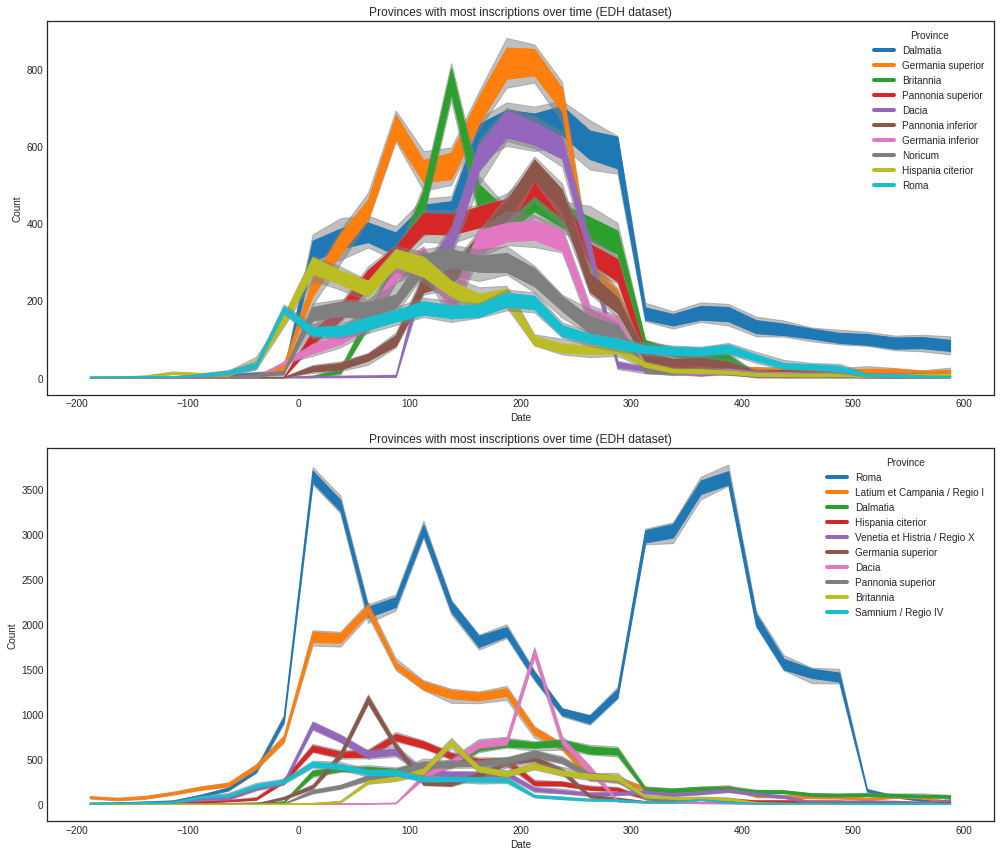

In [128]:
# plot combining EDH and EDCS
tab_colors_list = list(mcolors.TABLEAU_COLORS.keys())
plt.style.use("seaborn-white")

fig, [ax1, ax2]  = plt.subplots(2, 1, figsize=(14, 12), tight_layout=True)

for ins_type_sims, color in zip(simulations_by_prov_EDH, tab_colors_list[:len(simulations_by_prov_EDH)]):
    tempun.plot_timeblocks_data(ins_type_sims[2], ax=ax1, color=color)
    
ax1.set_xlabel("Date")
ax1.set_ylabel("Count")
ax1.set_title("Provinces with most inscriptions over time (EDH dataset)")
 
markers = [plt.Line2D([0,0],[0,0],color=color, lw=4) for color in tab_colors_list[:len(simulations_by_prov_EDH)]]
ax1.legend(markers, [tup[0] for tup in simulations_by_prov_EDH], numpoints=1,  title="Province", bbox_to_anchor=(1, 1), loc='upper right')

for ins_type_sims, color in zip(simulations_by_prov_EDCS, tab_colors_list[:len(simulations_by_prov_EDCS)]):
    tempun.plot_timeblocks_data(ins_type_sims[2], ax=ax2, color=color)
    
ax2.set_xlabel("Date")
ax2.set_ylabel("Count")
ax2.set_title("Provinces with most inscriptions over time (EDH dataset)")
 
markers = [plt.Line2D([0,0],[0,0],color=color, lw=4) for color in tab_colors_list[:len(simulations_by_prov_EDCS)]]
ax2.legend(markers, [tup[0] for tup in simulations_by_prov_EDCS], numpoints=1,  title="Province", bbox_to_anchor=(1, 1), loc='upper right')

### Disussion: The epigraphic production in time

As demonstrated in the analytical part of the article, the 'epigraphic habit' and the curves of epigraphic production highly depend on the choice of source. Both presented datasets have different spatial and temporal coverage and thus they both produce different images of epigraphic activity throughout the Roman Empire in space and time.

Athough the epigraphic community has done a tremendous amount of work standardizing the data by establishing the Epidoc XML format and there has been a great effort put into digitising and publishing resources online, the outcomes of quantitative studies are still relatively limited. Until there is a solution for connecting various epigraphic databases into one LOD source, as proposed by Epigraphy.info community, the outcomes of quantitative research in epigraphy will highely depend on the selection of dataset.

We are hopeful, that in not so distant future, maybe even before 2025, we will be able finally start asking the questions that were bothering epigraphers and historians since the time of MacMullen in 1982. But before that, more effort has to be put into building a sustainable and FAIR solutions, linking the existing datasets and providing paths to digital research. 
